In [1]:
%matplotlib inline


This is an example on how to use the get_era5() function.

This program reads ERA5 data fields directly into memory with Python. It is from

https://towardsdatascience.com/read-era5-directly-into-memory-with-python-511a2740bba0

Step 1: Registered an Copernicus account at https://cds.climate.copernicus.eu/user/21564/edit.

1.      Create an account with Copernicus by signing up here.
2.      Once you have an account, sign in to your Copercius account here and note the UID and API key at the bottom of the page.
3.      Paste the code snippet below into your terminal, replacing <UID> and <API key> with those from step 2:
{
  echo 'url: https://cds.climate.copernicus.eu/api/v2'
  echo 'key: UID:API_KEY'
  echo 'verify: 0'
} > ~/.cdsapirc
    
The above command creates the file ~/.cdsapirc (in your home directory) with your API key, which is necessary to use the CDS API. As a sanity check, use more ~/.cdsapirc to ensure everything appears correct. A correct file will look similar to this:
    
url: https://cds.climate.copernicus.eu/api/v2
key: 12345:a99b9c9d-9e99-9999-9999-fg99h9i99j9k
verify: 0

Install CDS API client pacakge:
    
Once you have your API key in ~/.cdsapirc you can install the cdsapi client via conda or pip:

pip install cdsapi
or
conda install cdsapi
    
They may be other packages used below you need to install if you don't have them already.

In [2]:
import cdsapi
import xarray as xr
from urllib.request import urlopen
import urllib3
import proplot as plot 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from get_era5_function import *  
# The above function is inside file get_era5_function.py placed within the same directory as this note book.

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

Get ERA5 reanalysis output from the web
This script grabs ERA5 variables from the web and stores them 
    in an xarray dataset. 
    
Available here: https://gist.github.com/lgloege/f461f8d192e99fe7c36760a7a856b007

Interface:

def get_era5(dataset_name='reanalysis-era5-single-levels', 
             var=None, 
             dates=None,
             pressure_level=None,
             grid=[1.0, 1,0],
             area=[90, -180, -90, 180],
             download_flag = False,
             download_file='./output.nc'
            ):

    
    the ERA5 CDS API must be installed on the local machine.
    See section 4 here: https://cds.climate.copernicus.eu/api-how-to
    
    Parameters
    ----------                  
    dataset_name: str, default 'reanalysis-era5-single-levels'
        name of dataset to use. Options include:
        * 'reanalysis-era5-single-levels'
        * 'reanalysis-era5-single-levels-monthly-means'
        * 'reanalysis-era5-pressure-levels'
        * 'reanalysis-era5-pressure-levels-monthly-means'
        * 'reanalysis-era5-land'
        * 'reanalysis-era5-land-monthly-means'
        
    dates: list of strings or datetime64, default None
        example ['1980-01-01', '2020-12-31']
    var: str, default None
        name of variable to download
        example '2m_temperature'
    pressure_level: str, default None
        pressure level to grab data on
    grid: list, deafult [1.0, 1.0]
        spatial lat, lon grid resolution in deg
    area: list, default [90,-180,-90, 180]
        area extent download [N, W, S, E]
    download_flag = True or False, default False
        flag to download data or not
    download_file= str, default './output.nc'
        path to where data should be downloaed to.
        data only downloaded if download_flag is True
    Returns
    -------
    ds: xarrayDataSet
        all the data will be in an xarray dataset

In [3]:
ds_out = get_era5(dataset_name='reanalysis-era5-single-levels-monthly-means', 
                 var='2m_temperature', 
                 dates=['2021-02-01'],
                 grid=[0.125, 0.125])

!! Pressure level must be in this list: [1, 2, 3, 5, 7, 10, 20, 30, 50, 70, range(100, 1000, 25)]


2022-03-07 23:57:15,245 INFO Welcome to the CDS
2022-03-07 23:57:15,246 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2022-03-07 23:57:15,472 INFO Request is completed
2022-03-07 23:57:24,406 INFO failed to import boto3, continuing.


In [8]:
cds = cdsapi.Client()

'''
# Download file
# The following code can be obtained by manually selecting the fields needed.
# https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels?tab=form

fl = cds.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'time': ['00:00', '01:00',],
        'day': ['01', '02',],
        'month': ['01', '02',],
        'year': ['2021', '2022',],
        'area': [80, -140, 10, -50,],
        'variable': ['10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature',
                     'mean_sea_level_pressure',],
    },
    'era5_download.nc')
'''

fl = cds.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'time': ['00:00', '01:00',],
        'day': ['01', '02',],
        'month': ['01', '02',],
        'year': ['2021', '2022',],
        'area': [80, -140, 10, -50,],
        'variable': ['10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature',
                     'mean_sea_level_pressure',],
    })

fl.download("./era5_download.nc")
#ds_out1 = xr.open_dataset( 'era5_download.nc' )

# load into memory
with urlopen(fl.location) as f:
    ds_out1 = xr.open_dataset(f.read())
     

2022-03-08 00:01:24,998 INFO Welcome to the CDS
2022-03-08 00:01:24,999 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-03-08 00:01:25,185 INFO Request is completed
2022-03-08 00:01:25,318 INFO Downloading https://download-0000.copernicus-climate.eu/cache-compute-0000/cache/data2/adaptor.mars.internal-1646718986.3127053-28217-11-da30d076-285a-4100-9095-f64dc48a3967.nc to ./era5_download.nc (24.8M)
2022-03-08 00:01:55,491 INFO Download rate 840.7K/s                                                                                                 


In [5]:
#ds_out1 = xr.open_dataset( 'download.nc' )
ds_out1

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 281, expver: 2, time: 16)
Coordinates:
  * longitude  (longitude) float32 -140.0 -139.8 -139.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 80.0 79.75 79.5 79.25 ... 10.5 10.25 10.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2021-01-01 ... 2022-02-02T01:00:00
Data variables:
    u10        (time, expver, latitude, longitude) float32 ...
    v10        (time, expver, latitude, longitude) float32 ...
    t2m        (time, expver, latitude, longitude) float32 ...
    msl        (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-03-08 05:56:26 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

<xarray.DataArray 't2m' (time: 16, expver: 2, latitude: 281, longitude: 361)>
[3246112 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -140.0 -139.8 -139.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 80.0 79.75 79.5 79.25 ... 10.5 10.25 10.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2021-01-01 ... 2022-02-02T01:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature (281, 361)


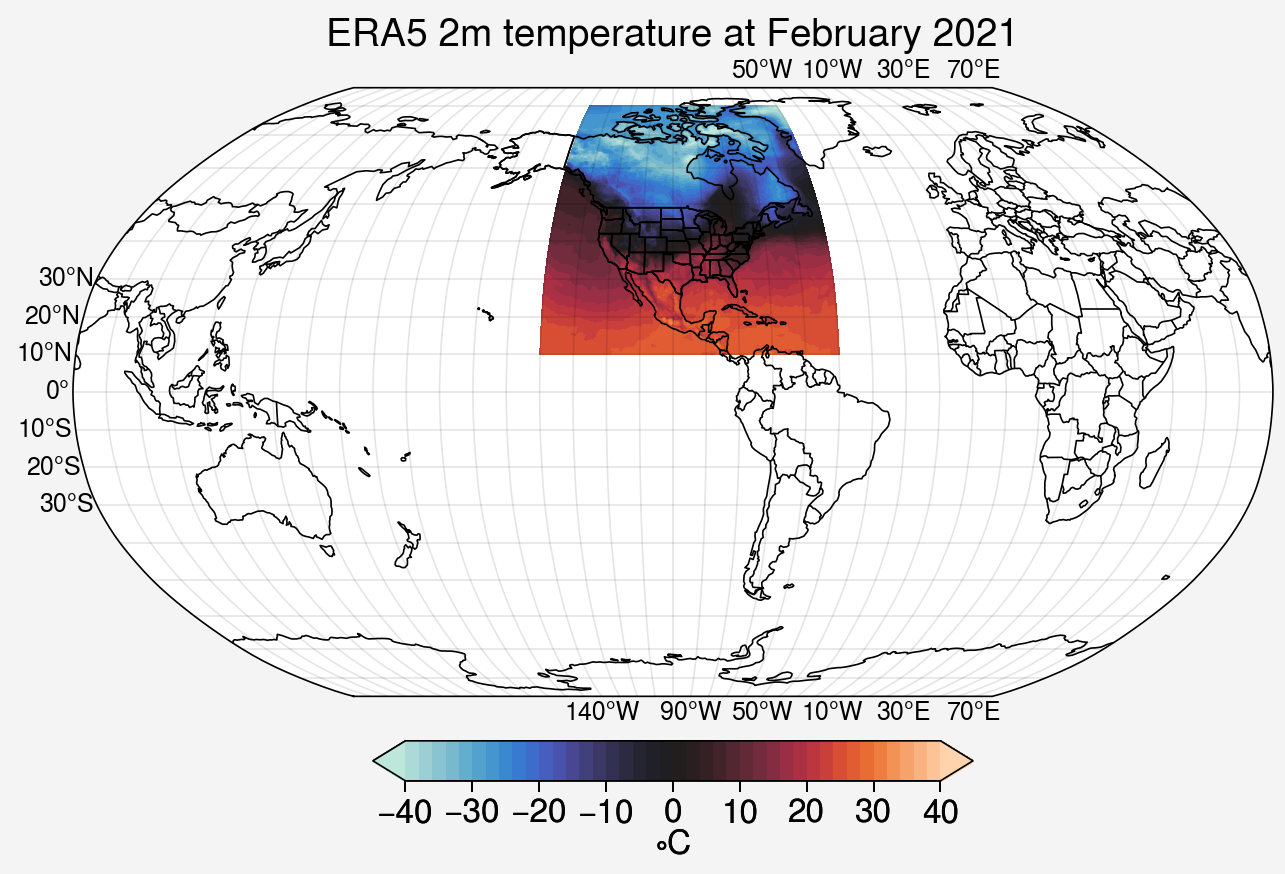

In [7]:


# create figure and axes
fig, ax = plot.subplots(axwidth=6, tight=True, proj='robin', proj_kw={'lon_0': -100},)


# format options
ax.format(land=False, 
          coast=True, 
          innerborders=True, 
          borders=True,
          labels=True,
#          latlines=None, lonlines=None)
          latlines=10.0, lonlines=10.0)

# plot data

TIMEstring = '2022-02-02T01:00:00.000000000'
latmin=-90
latmax=90
lonmin=0
lonmax=360

#t2m_field = ds_out1['t2m'].sel(time=TIMEstring,expver=5,latitude=slice(latmax,latmin),longitude=slice(lonmin,lonmax))
t2m_field = ds_out1['t2m'].sel(time=TIMEstring,expver=5)


print(ds_out1['t2m'], t2m_field.shape )
map1 = ax.contourf(ds_out1['longitude'], ds_out1['latitude'],t2m_field.squeeze()-273.15,
                   vmin=-40, vmax=40,
                   cmap='IceFire', 
                   extend='both',
                   levels=50)

# set the title
ax.set_title('ERA5 2m temperature at February 2021', fontsize=14)

# set the colorbar
col = ax.colorbar(map1, loc='b', shrink=0.5, values=np.arange(-40, 40))
col.set_label('$\circ$C', labelpad=0, size=12)
col.ax.tick_params(labelsize=12)

plt.show()

#plt.savefig('era5map.pdf')
#plt.savefig('era5map.png')